# Задача 4

In [41]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

In [50]:
lim = 4
N = 10000  # Размер выборки
M = 1000  # Число отрезков разбиения [-lim, lim]

# Эмпирическая функция распределения
def EmpFun(xs, n):
    step = np.linspace(-lim, lim, M)
    res = np.zeros(M)
    for i in range(M):
        res[i] = sum(k<=step[i] for k in xs[:n])/float(n)
    return (step, res)

# Генерация выборки из нормального распределения размера N
s_nor = norm.rvs(size=N)

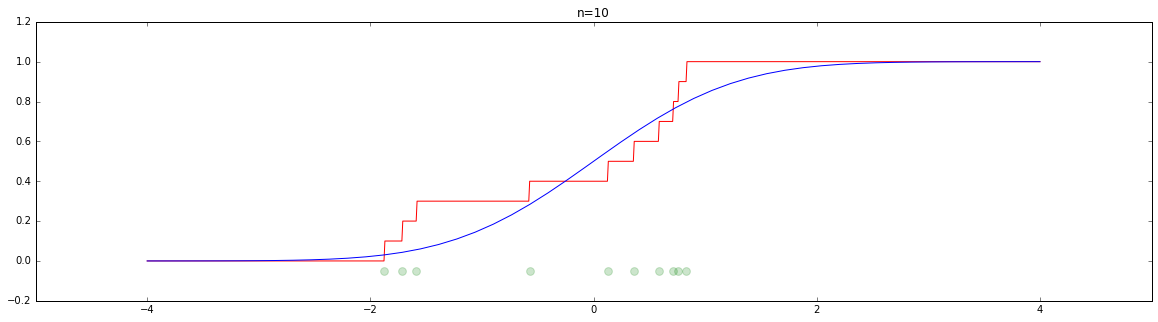

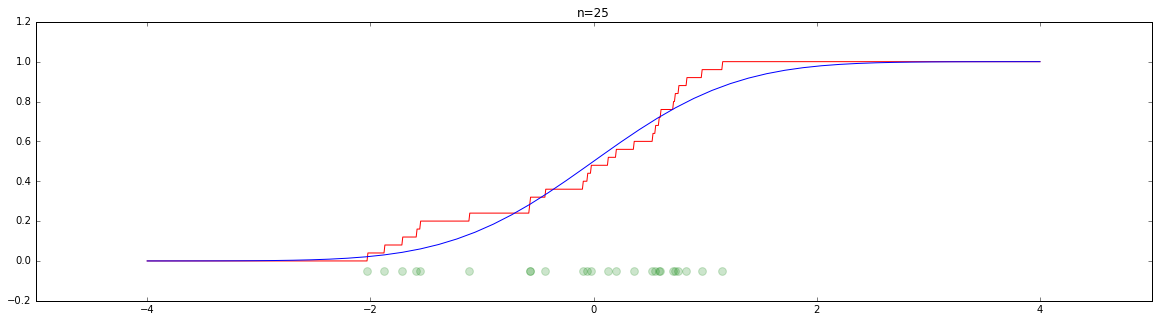

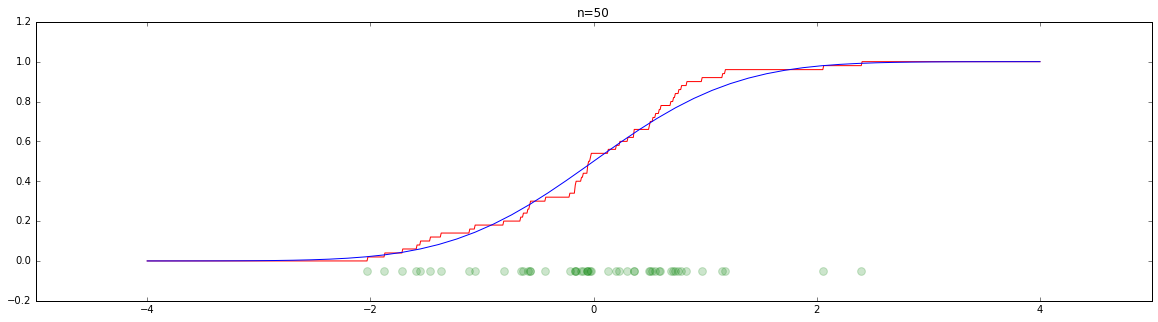

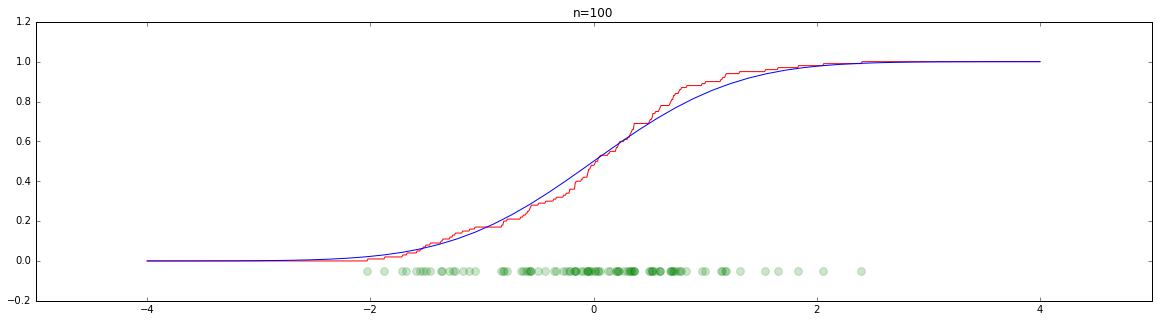

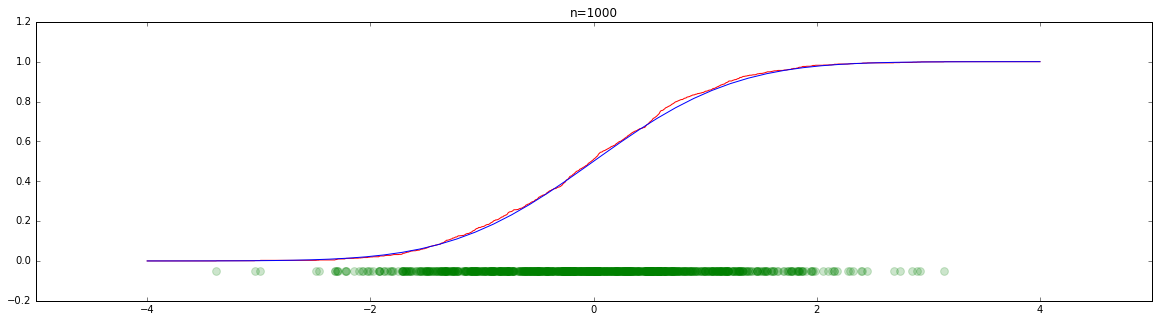

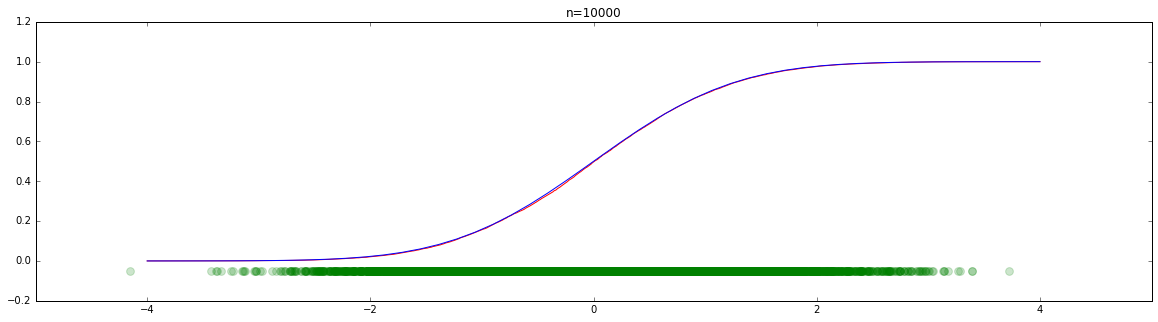

In [43]:
# "Некоторые" n
ns = [10,25,50,100,1000,N]

# Построение графиков и нанесение значений элементов из выборки s_nor
for i in ns:
    figure(figsize=(20, 5))
    
    x, y = EmpFun(s_nor,i)
    plot(x, y, 'r')
    title('n={}'.format(i))
    
    x = np.linspace(-lim,lim)
    plot(x, norm.cdf(x), 'b')
    
    scatter(s_nor[0:i], np.zeros(i)-0.05, s=60, color='g', alpha=0.2)
    
    show()

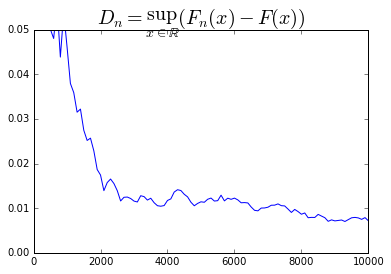

In [51]:
K = 100  # Число отрезков разбиения [1, N] для
         # подсчета sup(F_n - F)

tmp = 0
grid = np.array([ tmp+(i*(N/K)) \
                 for i in range(K+1) ]) # Разбиение отрезка [1, N]
                                        # (набор значений n). Т. к.
                                        # число отрезков равно K, то
                                        # кол-во точек разбиения равно K+1
grid[0] += 1  # Чтобы grid начинался с 1

dev = []  # Сюда запишу sup(F_n - F) для значений n из grid

# Записываю sup(F_n - F) в массив dev
for i in grid:
    # x - разбиение отрезка [-lim, lim],
    # y - значения эмпирической функции распределения для первых i
    # элементов выборки s_nor
    x, y = AnEmpFun(s_nor,i)
    dev.append(max(abs(norm.cdf(x)-y)))

# Построение графика
figure()
ylim(0, 0.05)
plot(grid, dev)
title('$D_n = \sup_{x \in \mathbb{R}}(F_{n}(x)-F(x))$', fontsize=20)
show()